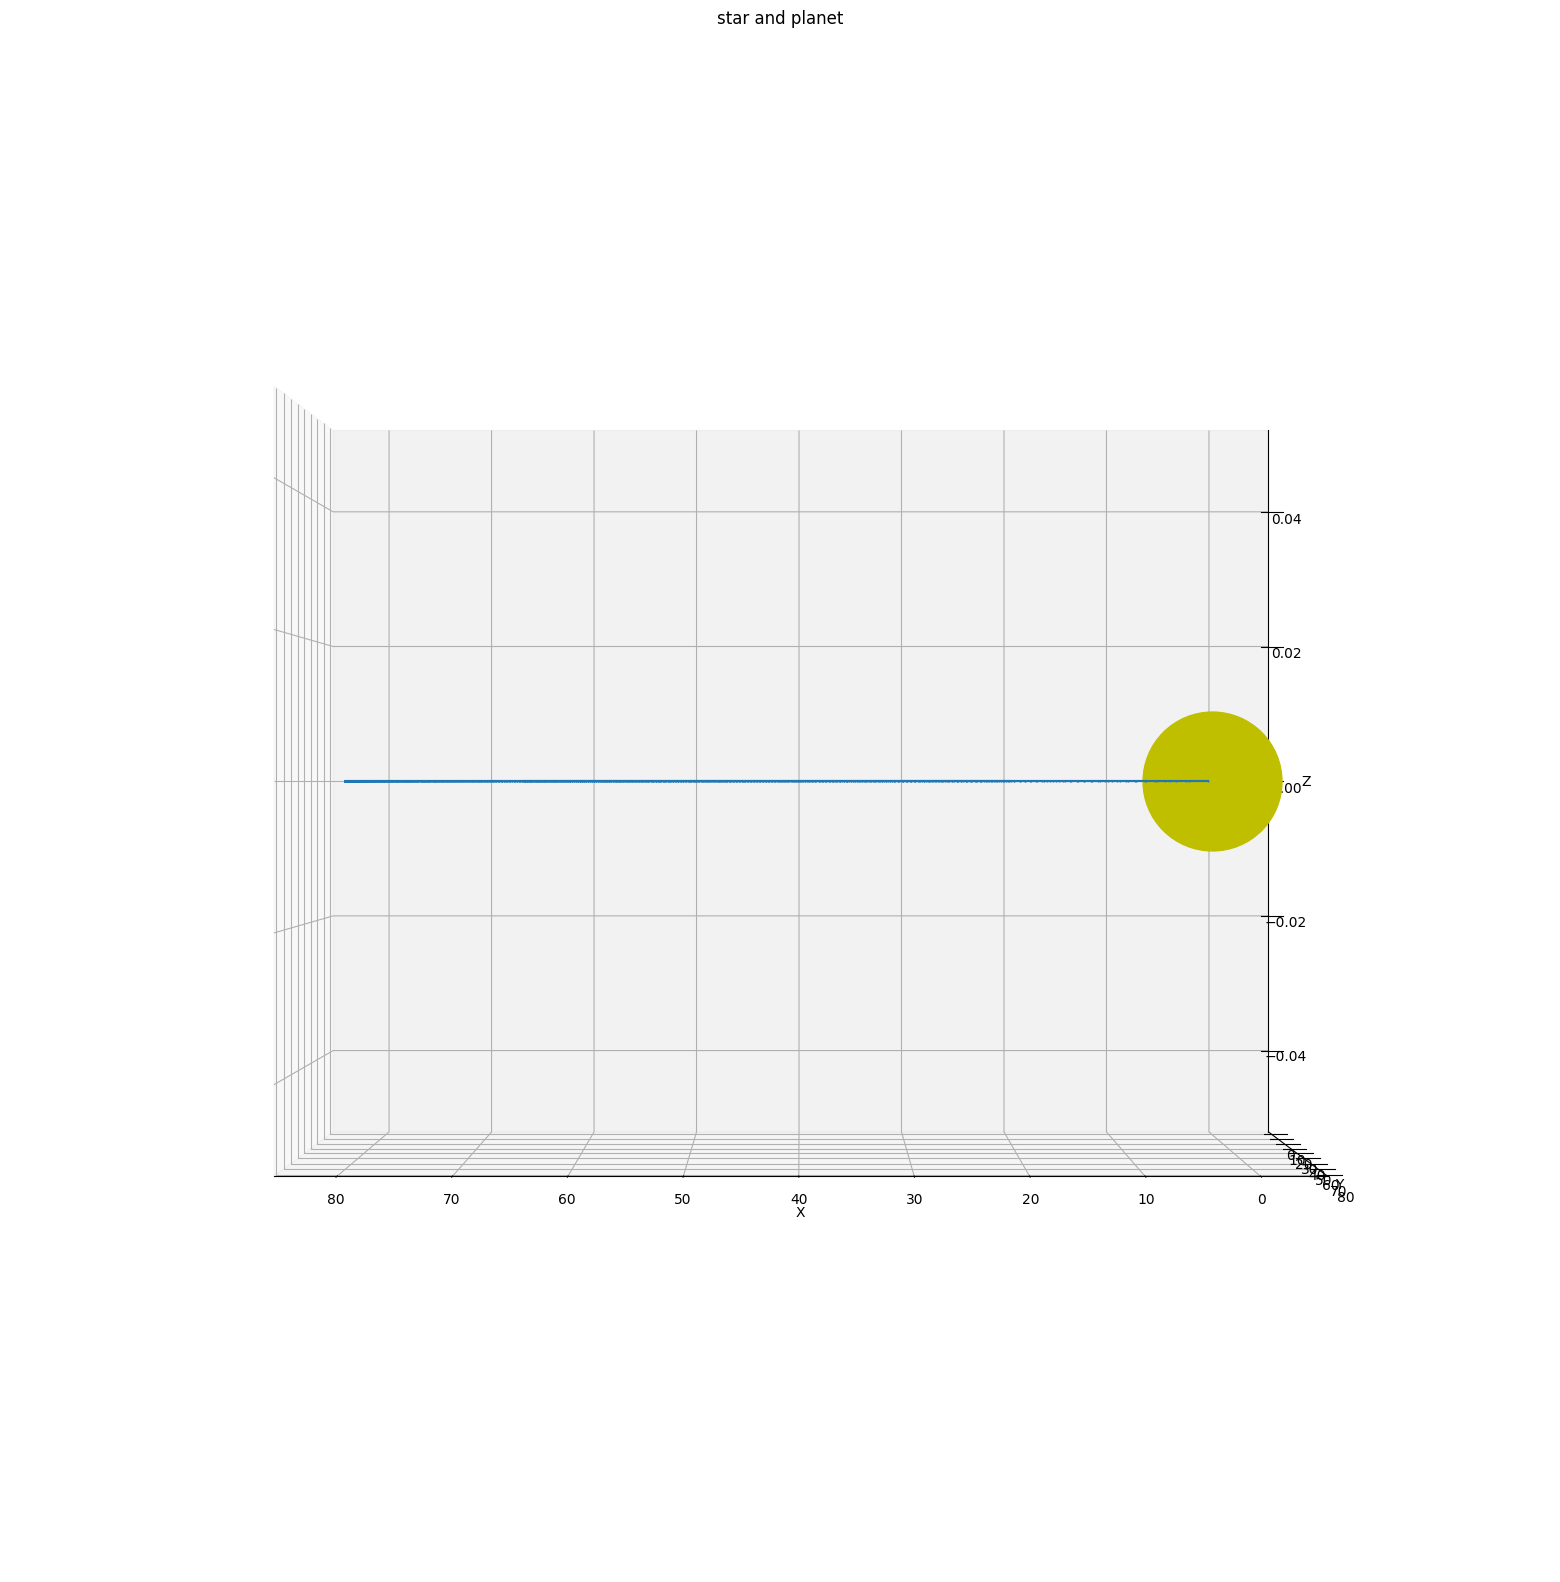

In [33]:
# Author      : Carlos Eduardo da Silva Lima
# Theme       : Movement of a Plant around a fixed star
# Language    : Python
# date        : 11/19/2022
# Environment : Google Colab
# Bibliography: computational Physics Nicholas J. Giordano and Hisao Nakanishi Chapter 4 page 94 second edition.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

# Initial conditions of the planet
x0 = 20.0 # componente da posição inicial - x
y0 = 1.18  # componente da posição inicial - y
vx0 = 1.0  # componente da velôcidade inicial - vx
vy0 = 1 # componente da velôcidade inicial - vy
t_initial = 0.0
t_final   = 500
N = 1000

# Dynamic equations of motion of the planet around the Sun
# for odeint
def edo(r,t):
  x,y,vx,vy = r
  r3 = np.power((x**2+y**2),3/2)
  return np.array([vx,vy,-4*np.power(np.pi,2)*(x/r3),-4*np.power(np.pi,2)*(y/r3)])

# for solve_ivp
def edo_(t,r):
  x,y,vx,vy = r
  r3 = np.power((x**2+y**2),3/2)
  return np.array([vx,vy,-4*np.power(np.pi,2)*(x/r3),-4*np.power(np.pi,2)*(y/r3)])

# Integration of dynamic equations using odeint
t = np.linspace(t_initial,t_final,N)
r0 = np.array([x0,y0,vx0,vy0])
sol_0 = odeint(edo,r0,t)
#sol_1 = solve_ivp(edo_, t_span = [t_initial,t_final], y0 = r0, method='DOP853')

# New variables
x  = sol_0[:,0]
y  = sol_0[:,1]
vx = sol_0[:,2]
vy = sol_0[:,3]

# Plot
# plt.style.use('dark_background')
ax = plt.figure(figsize = (20,20)).add_subplot(projection='3d')
ax.view_init(azim=90, elev=0)

#Sole
ax.plot(0,0,0,'yo', markersize=100)
#Pianet
ax.plot(x,y,0,marker=".", markersize=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("star and planet")
plt.show()